In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\nk424\OneDrive\Scans\Desktop\training\Sample_Data\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [3]:
df = df.drop(['Name', 'PassengerId','Ticket','Cabin'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
df.duplicated().sum()


np.int64(111)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(775, 8)

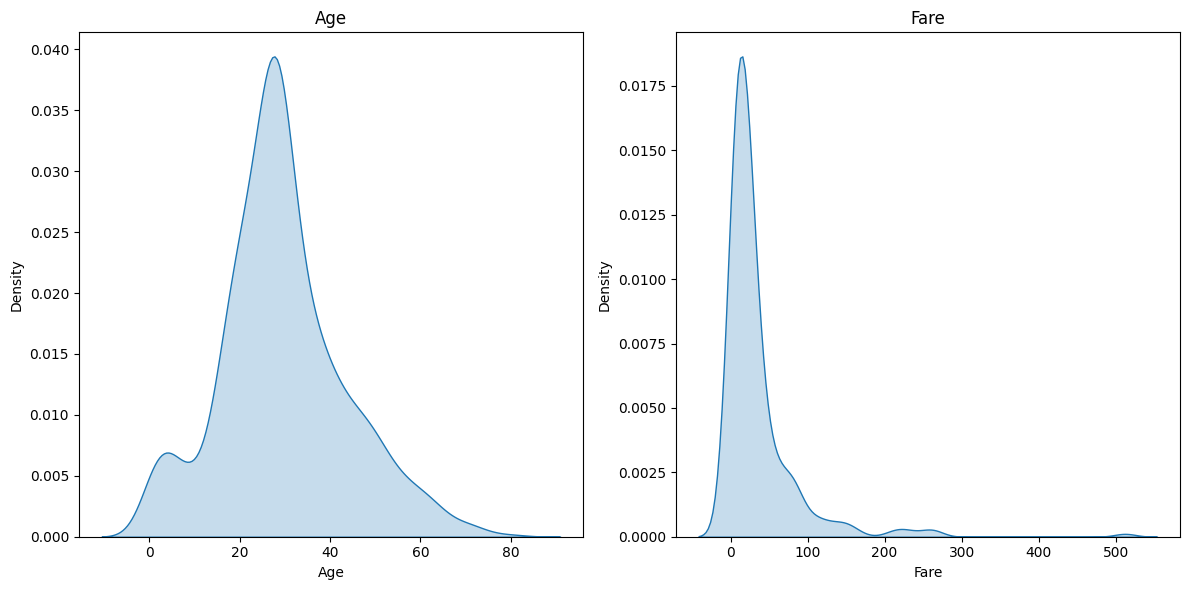

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
num_cols = ['Age','Fare']

# Create subplot grid
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='Age'>

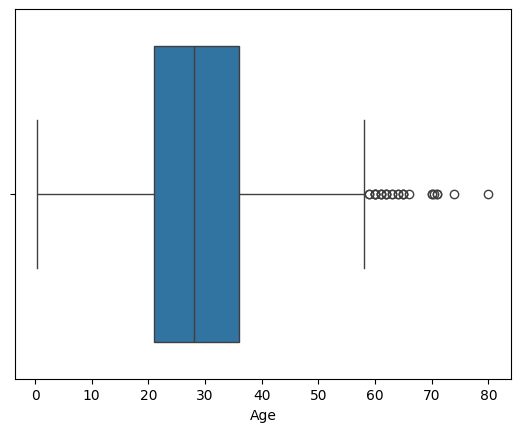

In [9]:
import seaborn as sns
sns.boxplot(df['Age'],orient='h')

In [10]:
df['Age'].skew()

np.float64(0.44198678493510685)

In [11]:
# we will apply z_score on Age because it is normally distributed
df['Age']=(df['Age']-df['Age'].mean())/df['Age'].std()
df['Age'].describe()

count    7.750000e+02
mean     2.567122e-16
std      1.000000e+00
min     -2.118293e+00
25%     -6.233447e-01
50%     -1.148588e-01
75%      4.662680e-01
max      3.662465e+00
Name: Age, dtype: float64

In [12]:
df_total = df[(df['Age'] > -3) & (df['Age'] < 3)]
df_total

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.550704,1,0,7.2500,S
1,1,1,female,0.611550,1,0,71.2833,C
2,1,3,female,-0.260140,0,0,7.9250,S
3,1,1,female,0.393627,1,0,53.1000,S
4,0,3,male,0.393627,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,0.684191,0,5,29.1250,Q
887,1,1,female,-0.768626,0,0,30.0000,S
888,0,3,female,-0.114859,1,2,23.4500,S
889,1,1,male,-0.260140,0,0,30.0000,C


<Axes: xlabel='Age'>

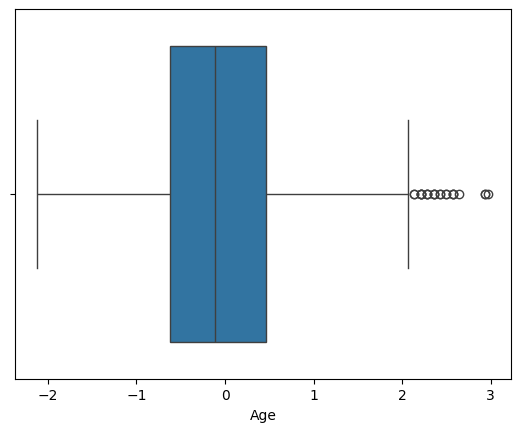

In [13]:
sns.boxplot(df_total['Age'],orient='h')

<Axes: xlabel='Fare'>

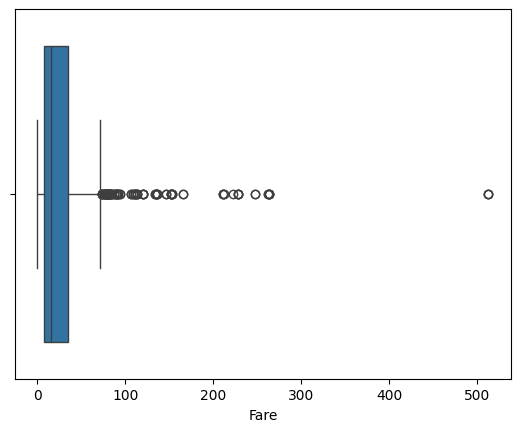

In [14]:
# removing outlier from Fare
sns.boxplot(df['Fare'],orient='h')

In [15]:
df_total['Fare'].skew()

np.float64(4.5402019359152455)

In [16]:
Q1 = df_total['Fare'].quantile(0.25)
Q3 = df_total['Fare'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Upper:", upper_limit)
print("Lower:", lower_limit)



Upper: 72.32600000000001
Lower: -30.515600000000003


In [17]:
df_total = df_total[(df_total['Fare'] >= lower_limit) &
                    (df_total['Fare'] <= upper_limit)]


<Axes: xlabel='Fare'>

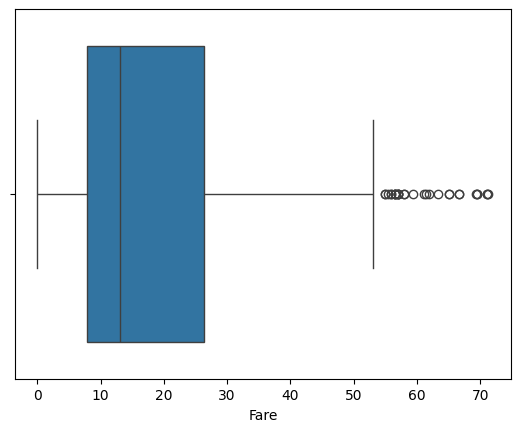

In [18]:
sns.boxplot(df_total['Fare'], orient='h')


In [19]:
df_total

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.550704,1,0,7.2500,S
1,1,1,female,0.611550,1,0,71.2833,C
2,1,3,female,-0.260140,0,0,7.9250,S
3,1,1,female,0.393627,1,0,53.1000,S
4,0,3,male,0.393627,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,0.684191,0,5,29.1250,Q
887,1,1,female,-0.768626,0,0,30.0000,S
888,0,3,female,-0.114859,1,2,23.4500,S
889,1,1,male,-0.260140,0,0,30.0000,C


In [20]:
# Encoding
df1=df.select_dtypes(include=['object'])
df1

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
885,female,Q
887,female,S
888,female,S
889,male,C


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       775 non-null    object
 1   Embarked  775 non-null    object
dtypes: object(2)
memory usage: 18.2+ KB


In [22]:
df1['Sex'].value_counts()

Sex
male      483
female    292
Name: count, dtype: int64

In [23]:
df1['Embarked'].value_counts()

Embarked
S    562
C    155
Q     58
Name: count, dtype: int64

In [24]:
# both is not ordinal so we will apply one hot
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop='first')
df_hot=ohe.fit_transform(df_total[['Sex','Embarked']])
df_hot




array([[1., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 1., 0.]], shape=(669, 3))

In [25]:
feature_names = ohe.get_feature_names_out(['Sex','Embarked'])
print(feature_names)


['Sex_male' 'Embarked_Q' 'Embarked_S']


In [26]:
import pandas as pd

df1 = pd.DataFrame(df_hot, columns=feature_names)


In [27]:
df1

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
664,0.0,1.0,0.0
665,0.0,0.0,1.0
666,0.0,0.0,1.0
667,1.0,0.0,0.0


In [28]:
df_total = df_total.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df_total = pd.concat([df_total, df1], axis=1)


In [29]:
df_total

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,0,3,male,-0.550704,1,0,7.2500,S,1.0,0.0,1.0
1,1,1,female,0.611550,1,0,71.2833,C,0.0,0.0,0.0
2,1,3,female,-0.260140,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,female,0.393627,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,male,0.393627,0,0,8.0500,S,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
664,0,3,female,0.684191,0,5,29.1250,Q,0.0,1.0,0.0
665,1,1,female,-0.768626,0,0,30.0000,S,0.0,0.0,1.0
666,0,3,female,-0.114859,1,2,23.4500,S,0.0,0.0,1.0
667,1,1,male,-0.260140,0,0,30.0000,C,1.0,0.0,0.0


In [30]:
df_total.drop(columns=['Sex','Embarked'],inplace=True)

In [31]:
df_total

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.550704,1,0,7.2500,1.0,0.0,1.0
1,1,1,0.611550,1,0,71.2833,0.0,0.0,0.0
2,1,3,-0.260140,0,0,7.9250,0.0,0.0,1.0
3,1,1,0.393627,1,0,53.1000,0.0,0.0,1.0
4,0,3,0.393627,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
664,0,3,0.684191,0,5,29.1250,0.0,1.0,0.0
665,1,1,-0.768626,0,0,30.0000,0.0,0.0,1.0
666,0,3,-0.114859,1,2,23.4500,0.0,0.0,1.0
667,1,1,-0.260140,0,0,30.0000,1.0,0.0,0.0
